In [1]:
import circlify
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv("datos_test_nuevos.csv")

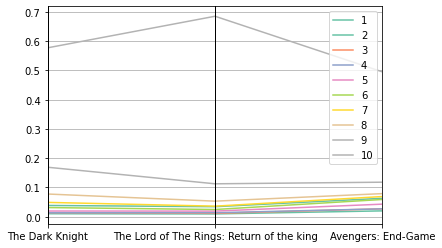

In [3]:
#plt.xticks(rotation="45")
#plt.stackplot(data["Estrellas"], data["The Dark Knight"], data["The Lord of The Rings: Return of the king"], data["Avengers: End-Game"], labels=['Dark Knight','Return of the King','End Game'])
#plt.legend(loc='upper left')
parallel_coordinates(data, 'Estrellas', colormap=plt.get_cmap("Set2"))
plt.savefig('lord_of_the_rings.png')
plt.show()

In [2]:
juegos_data = [
    {
        "id": "Total",
        "datum": 23,
        "children": [
            {
                "id": "Minecraft",
                "datum": 14,
                "children": [
                    {
                        "id": "Xperia Play",
                        "datum": 1
                    },
                    {
                        "id": "macOS",
                        "datum": 1
                    },
                    {
                        "id": "Linux",
                        "datum": 1
                    },
                    {
                        "id": "Microsoft Windows",
                        "datum": 1
                    },
                    {
                        "id": "Android",
                        "datum": 1
                    },
                    {
                        "id": "iOS",
                        "datum": 1
                    },
                    {
                        "id": "Xbox 360",
                        "datum": 1
                    },
                    {
                        "id": "Xbox One",
                        "datum": 1
                    },
                    {
                        "id": "PlayStation 3",
                        "datum": 1
                    },
                    {
                        "id": "PlayStation 4",
                        "datum": 1
                    },
                    {
                        "id": "PlayStation Vita",
                        "datum": 1
                    },
                    {
                        "id": "Raspberry Pi",
                        "datum": 1
                    },
                    {
                        "id": "Wii U",
                        "datum": 1
                    },
                    {
                        "id": "Nintendo Switch",
                        "datum": 1
                    }
                ]
            },
            {
                "id": "NieR: Automata",
                "datum": 3,
                "children": [
                    {
                        "id": "PlayStation 4",
                        "datum": 1
                    },
                    {
                        "id": "Microsoft Windows",
                        "datum": 1
                    },
                    {
                        "id": "Xbox One",
                        "datum": 1
                    }
                ]
            },
            {
                "id": "Counter Strike: Global Offensive",
                "datum": 6,
                "children": [
                    {
                        "id": "Microsoft Windows",
                        "datum": 1
                    },
                    {
                        "id": "macOS",
                        "datum": 1
                    },{
                        "id": "Linux",
                        "datum": 1
                    },
                    {
                        "id": "PlayStation 3",
                        "datum": 1
                    },{
                        "id": "Xbox 360",
                        "datum": 1
                    },
                    {
                        "id": "Xbox One",
                        "datum": 1
                    }
                ]
            }
        ]
    }
]

In [3]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    juegos_data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

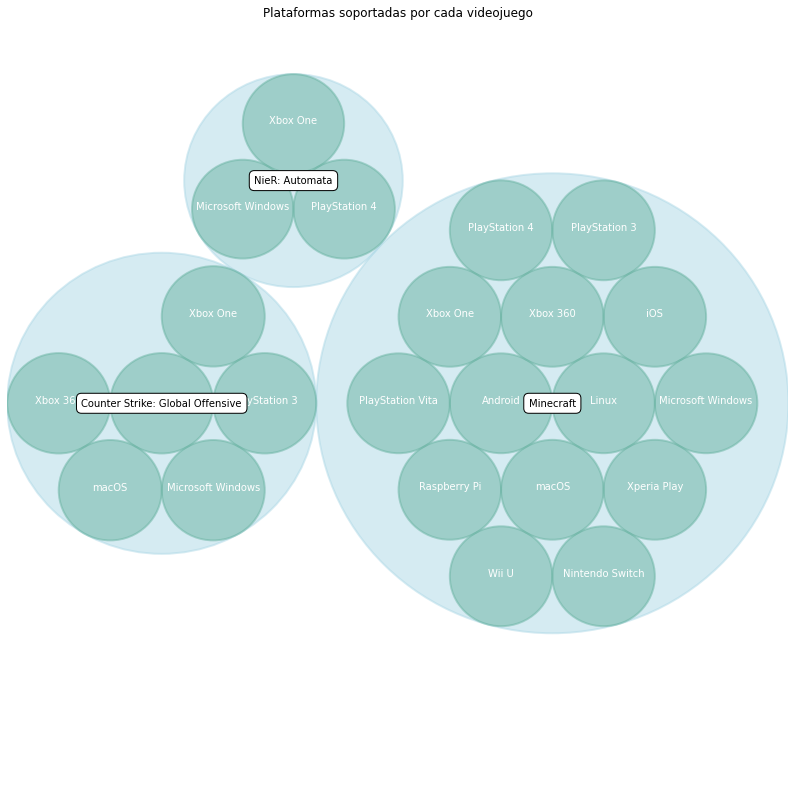

In [4]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Plataformas soportadas por cada videojuego')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
plt.savefig('minecraft.png')

